In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Neuroflow/phq_all_final.csv")

In [2]:
df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


In [8]:
df.patient_id.unique()

array([ 8430, 14338, 17028, ..., 17475,  9069,  4870])

In [3]:
df.shape
unique_ids=df.patient_id.unique()

## REMOVE DUPLICATE COLUMNS

In [ ]:
orig_cols = df.columns
display(df.shape)
keep_df = df.T.drop_duplicates().T
display(keep_df.shape)
keep_cols = list(keep_df.columns)
dup_cols = list(set(orig_cols) - set(keep_cols))
print(dup_cols)

(53698, 5)

(53698, 5)

[]


## MISSING VALUES

In [ ]:
missing_counts = df.isna().sum()
print(missing_counts)

date                    0
patient_id              0
type                    0
patient_date_created    0
score                   0
dtype: int64


## DATA VISUALIZATION

In [12]:
%matplotlib inline
from dateutil.parser import parse
import matplotlib.pyplot as plt
def visualize(val):
  x=[]
  y=[]
  j=0
  for i in range(len(df)):
    if (df['patient_id'][i]==int(val)):
      datetime_obj1 = parse(df['patient_date_created'][i])
      datetime_obj2= parse(df['date'][i])
      diff = datetime_obj2 - datetime_obj1
      x.append(diff.total_seconds())
      y.append(df['score'][i])
  plt.plot(x, y, label = val,marker='o')
  plt.xlabel('Time Difference (sec)')
  plt.ylabel('GAD-7 Scores')
  plt.title('GAD- 7 vs Time (Patient ID: ' + val + ')')
  plt.show()

Enter patient_id: 49


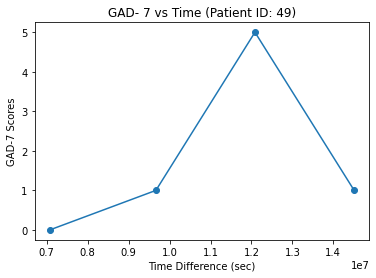

In [20]:
val = input("Enter patient_id: ")
if int(val) not in unique_ids:
  print('ID not found')
else:
  
  visualize(val)